**Importing all the libraries that we'll require for this data analysis.**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing and reading the dataset available with us in pandas library.**

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Customer.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Transactions.csv')
df3 = pd.read_csv('/content/drive/MyDrive/prod_cat_info.csv')

**A quick view of the Customer dataset declared as df1.**

In [ ]:
df1.head()

,customer_Id,DOB,Gender,city_code
0,268408,2-1-70,M,4.0
1,269696,7-1-70,F,8.0
2,268159,8-1-70,F,8.0
3,270181,10-1-70,F,2.0
4,268073,11-1-70,M,1.0


**Getting a quick info of the Customer dataset.**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


**A quick view of the Transactions dataset declared as df2.**

In [ ]:
df2.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


**Getting a quick info of Transactions dataset.**




In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


**A quick view of the prod_cat_info dataset declared as df3.**

In [ ]:
df3.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


**Getting a quick info of the prod_cat_info dataset.**

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


**==>  Merging Customer --->(df1) and Transaction --->(df2) dataset together and declaring it as df_cu_tr.**


**==>  By analysing through quick window of df.head() and df.info() operations done above it can be said that df1 having 'customer_id' column and df2 having 'cust_id' column are same and merging of the two dataset is possible based on these two columns.**



In [ ]:
df_cu_tr = pd.merge(left=df1, right=df2, left_on='customer_Id', right_on='cust_id')
df_cu_tr.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,2-1-70,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,2-1-70,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,2-1-70,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,2-1-70,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store


**==>  Merging df_cu_tr (Merged dataset of df1 and df2) with df3 (prod_cat_info) dataset by a common column 'prod_cat_code' available in both the dataset and declaring it as 'df_all'.**

In [ ]:
df_all = pd.merge(left=df_cu_tr , right=df3, left_on='prod_cat_code', right_on='prod_cat_code')

**A quick view of df_all dataset.**

In [ ]:
df_all.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,12,Academic
2,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,10,Non-Fiction
3,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,11,Children
4,268408,2-1-70,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,3,Comics


**A quick info of df_all dataset.**

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99293 entries, 0 to 99292
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        99293 non-null  int64  
 1   DOB                99293 non-null  object 
 2   Gender             99253 non-null  object 
 3   city_code          99257 non-null  float64
 4   transaction_id     99293 non-null  int64  
 5   cust_id            99293 non-null  int64  
 6   tran_date          99293 non-null  object 
 7   prod_subcat_code   99293 non-null  int64  
 8   prod_cat_code      99293 non-null  int64  
 9   Qty                99293 non-null  int64  
 10  Rate               99293 non-null  int64  
 11  Tax                99293 non-null  float64
 12  total_amt          99293 non-null  float64
 13  Store_type         99293 non-null  object 
 14  prod_cat           99293 non-null  object 
 15  prod_sub_cat_code  99293 non-null  int64  
 16  prod_subcat        992

**Here in df_all.info() table above we can see that column "DOB" data type is object and not in datetime format. Therfore we can change it into datetime format so that analysis can be done based on that wherever required**

Changing "DOB" Dtype(object) ==== > "DOB" Dtype(datetime)

In [ ]:
df_all['DOB'] = pd.to_datetime(df_all['DOB'])
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99293 entries, 0 to 99292
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_Id        99293 non-null  int64         
 1   DOB                99293 non-null  datetime64[ns]
 2   Gender             99253 non-null  object        
 3   city_code          99257 non-null  float64       
 4   transaction_id     99293 non-null  int64         
 5   cust_id            99293 non-null  int64         
 6   tran_date          99293 non-null  object        
 7   prod_subcat_code   99293 non-null  int64         
 8   prod_cat_code      99293 non-null  int64         
 9   Qty                99293 non-null  int64         
 10  Rate               99293 non-null  int64         
 11  Tax                99293 non-null  float64       
 12  total_amt          99293 non-null  float64       
 13  Store_type         99293 non-null  object        
 14  prod_c

**Deriving a quick statistical summary of "df_all" dataset.**

In [ ]:
df_all.describe()

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
count,99293.000000,99257.000000,9.929300e+04,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000
mean,271030.010635,5.467221,5.007320e+10,271030.010635,6.796894,4.003243,2.438017,637.919884,248.873736,2114.616420,6.806985
std,2429.333624,2.859343,2.899361e+10,2429.333624,3.609439,1.563991,2.260726,621.576326,187.014422,2502.306768,3.615952
min,266783.000000,1.000000,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,268956.000000,3.000000,2.492150e+10,268956.000000,4.000000,3.000000,1.000000,313.000000,98.280000,762.450000,4.000000
50%,270982.000000,5.000000,5.011083e+10,270982.000000,7.000000,5.000000,3.000000,713.000000,199.920000,1761.370000,7.000000
75%,273120.000000,8.000000,7.528121e+10,273120.000000,10.000000,5.000000,4.000000,1109.000000,366.975000,3585.725000,10.000000
max,275265.000000,10.000000,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,12.000000


**Finding out all kind of unique store in our Dataframe.**

In [ ]:
df_all.Store_type.unique()

array(['TeleShop', 'MBR', 'e-Shop', 'Flagship store'], dtype=object)

**Finding out the count/number of stores available category wise.**

In [ ]:
stores = df_all.Store_type.value_counts()
stores

e-Shop            40185
MBR               19974
Flagship store    19814
TeleShop          19320
Name: Store_type, dtype: int64

**Visualizing distribution of stores in a pie chart.**

([<matplotlib.patches.Wedge at 0x7d97c9f1ee00>,
 [Text(0.3243977758137088, 1.0510785332443617, 'e-Shop'),
  Text(-1.099391878593445, -0.0365718099466802, 'MBR'),
  Text(-0.30258063941899427, -1.0575655803063906, 'Flagship store'),
  Text(0.9008070997583455, -0.6313054482775817, 'TeleShop')],
 [Text(0.17694424135293205, 0.5733155635878336, '40.47%'),
  Text(-0.5996682974146063, -0.01994825997091647, '20.12%'),
  Text(-0.16504398513763321, -0.5768539528943948, '19.96%'),
  Text(0.4913493271409156, -0.3443484263332263, '19.46%')])

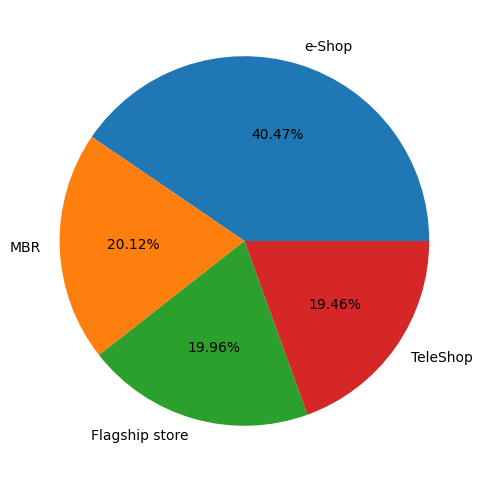

In [ ]:
plt.figure(figsize= (17,6))
plt.pie(stores, labels= stores.index, autopct='%0.2f%%')


**From the above Pie chart we can generate following insights.**

1)  E-shops are higher in number and consumes almost 40.50% of the market share.

2)  MBR, Flagship store, Teleshop almost consumes identical i.e, approx 20% each of the market share.



**Finding out the Gender categories available.**

In [ ]:
df_all.Gender.unique()

array(['M', 'F', nan], dtype=object)

In [ ]:
df_all.Gender.value_counts()

M    51051
F    48202
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

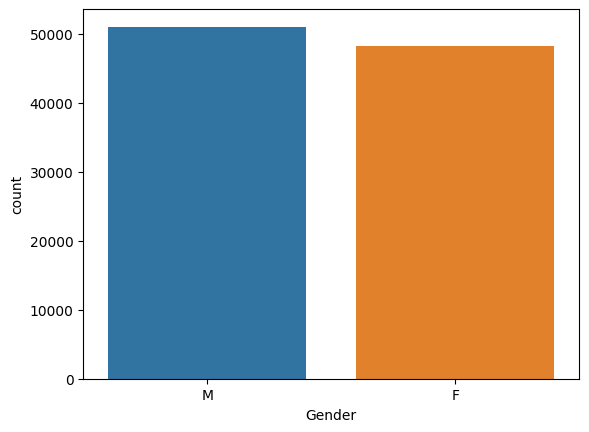

In [ ]:
sns.countplot(x='Gender', data=df_all)

**Finding the store visit for each category by gender wise**

In [ ]:
store_f_m = pd.crosstab(df_all.Store_type, df_all.Gender)
sorteddata = store_f_m.sort_values(by='F')
sorteddata

Gender,F,M
Store_type,,
TeleShop,9159,10142
MBR,9687,10278
Flagship store,9767,10047
e-Shop,19589,20584


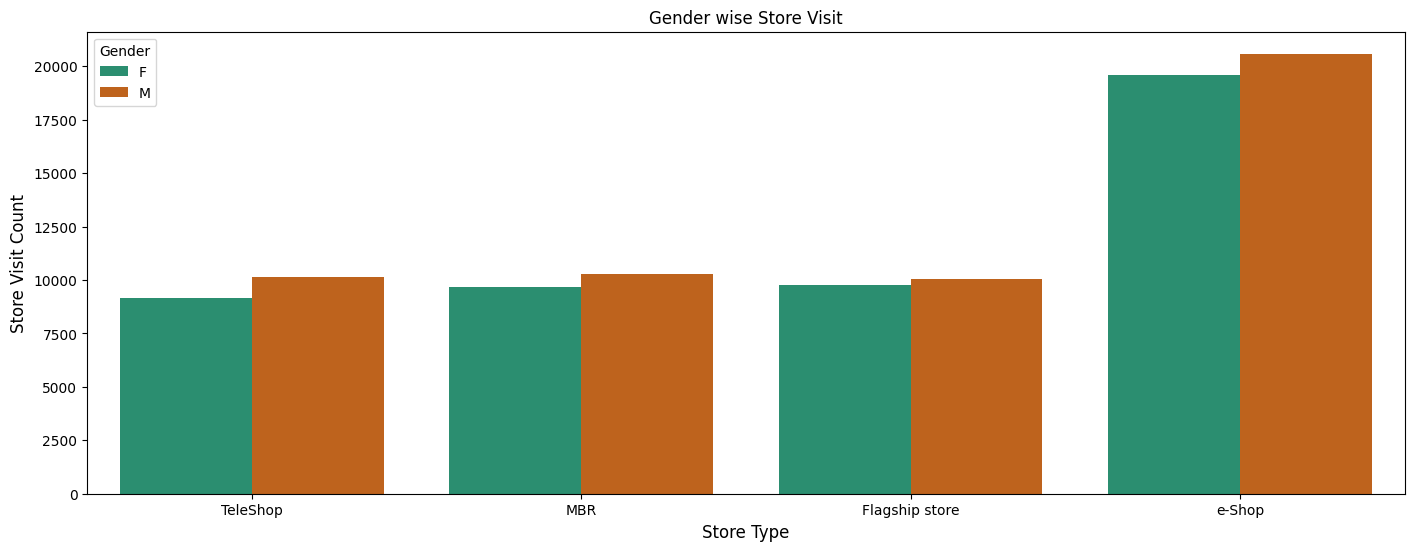

In [ ]:
data0 = {'Gender':['F','M'],
         'TeleShop':[9159,	10142],
         'MBR':[9687, 10278],
         'Flagship store':[9767, 10047],
        'e-Shop':[19589,	20584]}

df0 = pd.DataFrame(data0).set_index('Gender')
df01 = df0.stack().reset_index()
df01.columns = ['Gender', 'Store_type', 'Count']


plt.figure(figsize= (17,6))
sns.barplot(x='Store_type', y='Count', hue='Gender', data=df01, palette='Dark2')
plt.xlabel('Store Type',fontsize=12)
plt.ylabel('Store Visit Count', fontsize=12)
plt.title('Gender wise Store Visit')
plt.ticklabel_format(style='plain', axis='y')

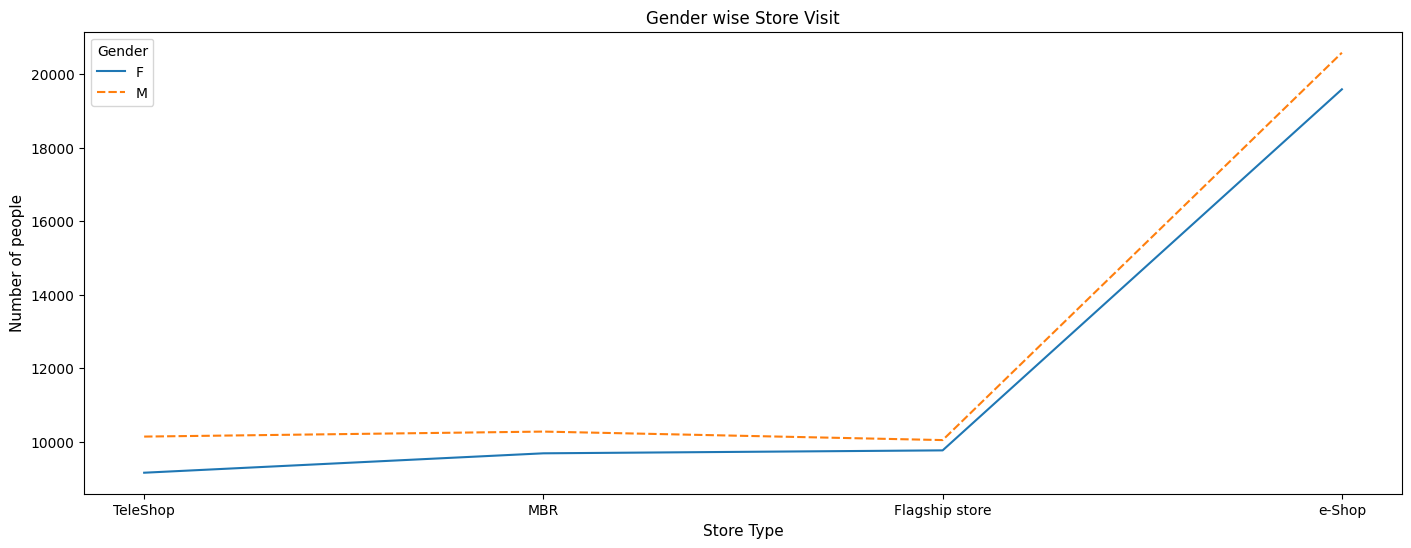

In [ ]:
plt.figure(figsize= (17,6))
sns.lineplot(sorteddata)
plt.title('Gender wise Store Visit')
plt.xlabel('Store Type', fontsize=11)
plt.ylabel('Number of people', fontsize=11)
plt.ticklabel_format(style='plain', axis='y')

Text(0.5, 23.52222222222222, 'Gender')

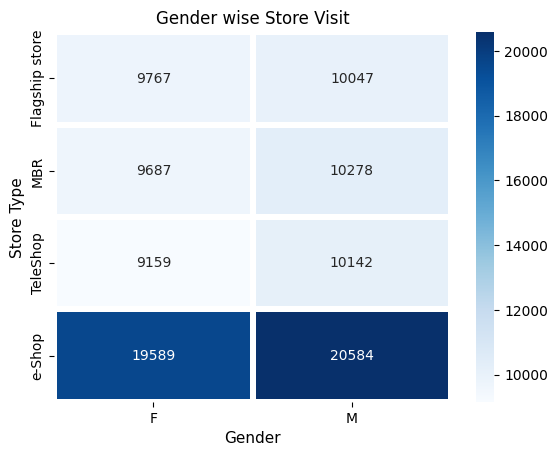

In [ ]:
sns.heatmap(store_f_m , annot=True, linewidths = 3, fmt='d', cmap='Blues')
plt.title('Gender wise Store Visit')
plt.ylabel('Store Type', fontsize=11)
plt.xlabel('Gender', fontsize=11)

**Fiding the sales of each unique product category gender wise.**

In [ ]:
K=pd.crosstab(df_all.prod_cat, df_all.Gender)
K =K.sort_values(by='M', ascending=False)
K

Gender,F,M
prod_cat,,
Books,17694,18696
Electronics,11640,12850
Home and kitchen,7976,8536
Clothing,4317,4554
Footwear,4587,4407
Bags,1988,2008


In [ ]:
T=pd.crosstab(df_all.prod_cat, df_all.Gender, margins=True)
sortedT = T.sort_values(by='All')
sortedT

Gender,F,M,All
prod_cat,,,
Bags,1988,2008,3996
Clothing,4317,4554,8871
Footwear,4587,4407,8994
Home and kitchen,7976,8536,16512
Electronics,11640,12850,24490
Books,17694,18696,36390
All,48202,51051,99253


Text(0.5, 23.52222222222222, 'Gender')

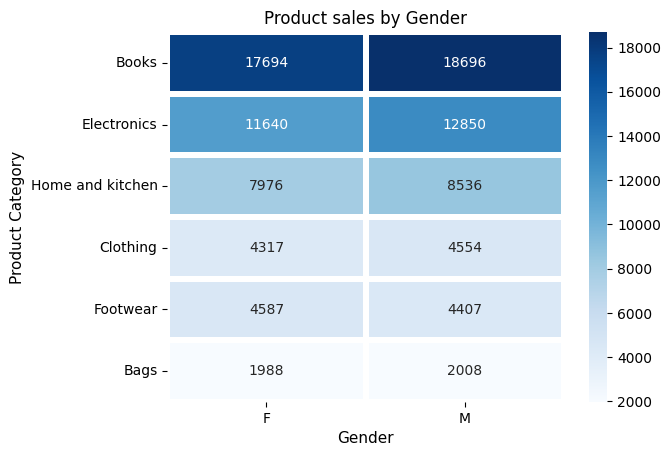

In [ ]:
sns.heatmap(K, annot=True, fmt='d', cmap='Blues', linewidths=3)
plt.title('Product sales by Gender')
plt.ylabel('Product Category', fontsize=11)
plt.xlabel('Gender', fontsize=11)

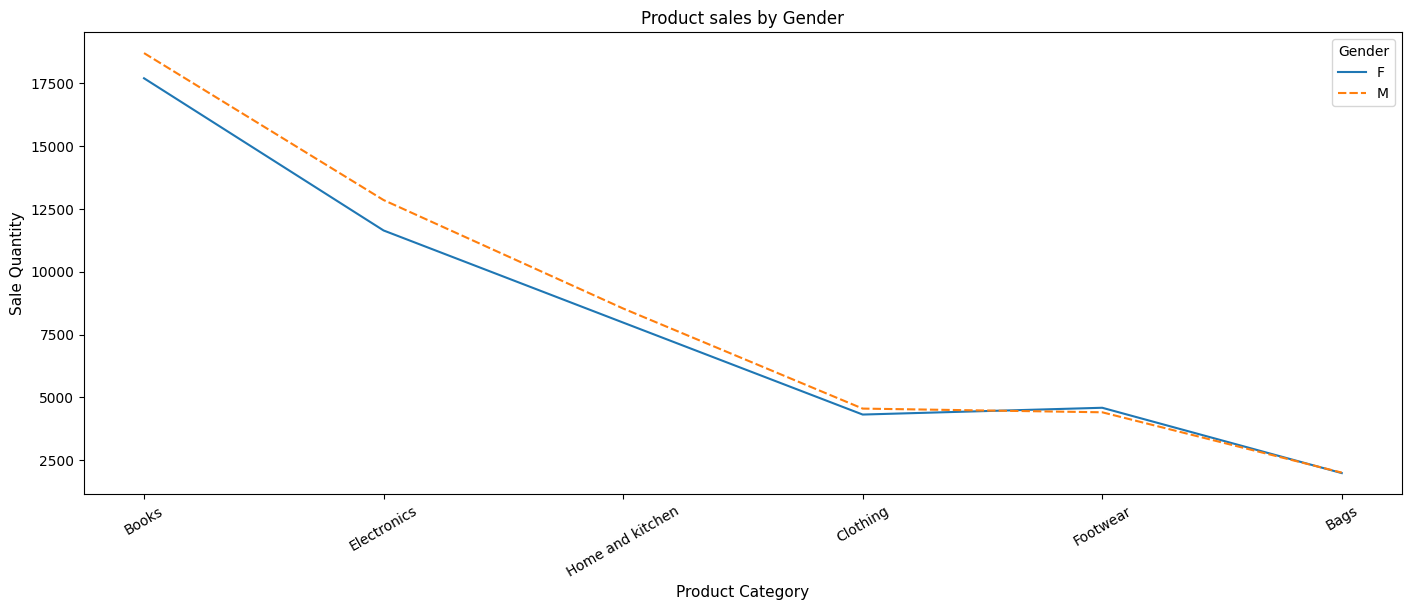

In [ ]:
plt.figure(figsize= (17,6))
sns.lineplot(K)
plt.title('Product sales by Gender')
plt.xlabel('Product Category', fontsize=11)
plt.ylabel('Sale Quantity', fontsize=11)
plt.xticks(rotation=30 )
plt.ticklabel_format(style='plain', axis='y')

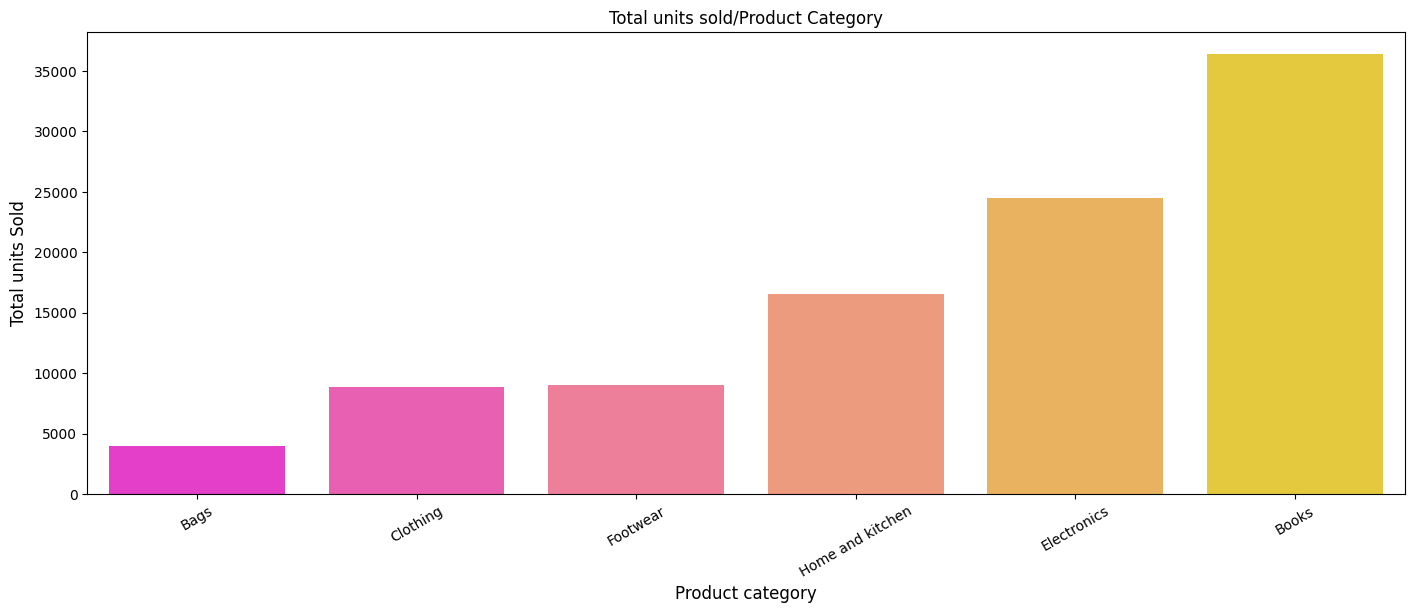

In [ ]:
plt.figure(figsize=(17,6))
sns.barplot(x=sortedT.index[0:6], y=sortedT.All[0:6], palette='spring')
plt.xticks(rotation=30)
plt.xlabel('Product category', fontsize=12)
plt.ylabel('Total units Sold', fontsize=12)
plt.title('Total units sold/Product Category')
plt.ticklabel_format(style='plain', axis='y')

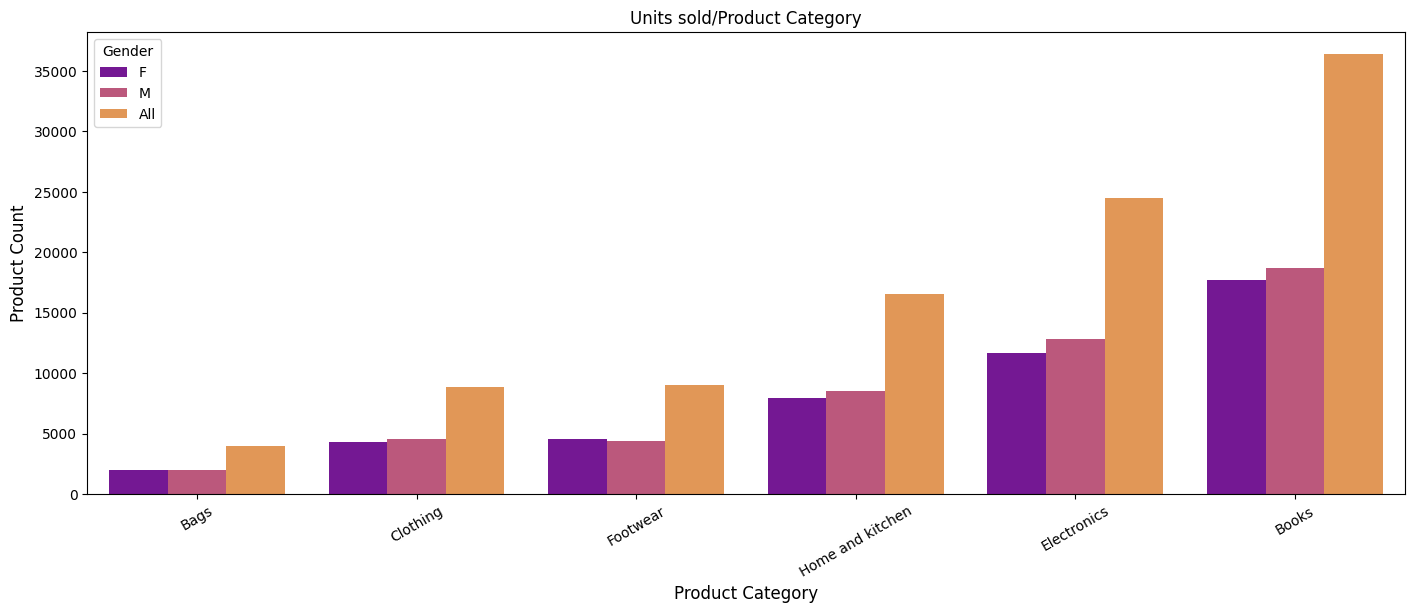

In [ ]:
data = {
    'Gender': ['F', 'M', 'All'],
    'Bags': [1988, 2008, 3996],
    'Clothing': [4317, 4554, 8871],
    'Footwear': [4587, 4407, 8994],
    'Home and kitchen': [7976, 8536, 16512],
    'Electronics': [11640, 12850, 24490],
    'Books': [17694, 18696, 36390]}

df = pd.DataFrame(data).set_index('Gender')
df = df.stack().reset_index()
df.columns = ['Gender', 'prod_cat', 'Count']


plt.figure(figsize=(17,6))
sns_plot = sns.barplot(x='prod_cat', y='Count', hue='Gender', data=df, palette='plasma')
plt.xticks(rotation=30)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Product Count', fontsize=12)
plt.title('Units sold/Product Category')
plt.ticklabel_format(style='plain', axis='y')

**Fiding the sales of each unique  product sub category gender wise.**

In [ ]:
u=pd.crosstab(df_all.prod_subcat, df_all.Gender)
u = u.sort_values(by='F', ascending=False)
u

Gender,F,M
prod_subcat,,
Women,3962,3991
Mens,3962,3991
Kids,2968,2987
DIY,2949,3116
Non-Fiction,2949,3116
Fiction,2949,3116
Academic,2949,3116
Comics,2949,3116
Children,2949,3116


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0, 0.5, 'Women'),
  Text(0, 1.5, 'Mens'),
  Text(0, 2.5, 'Kids'),
  Text(0, 3.5, 'DIY'),
  Text(0, 4.5, 'Non-Fiction'),
  Text(0, 5.5, 'Fiction'),
  Text(0, 6.5, 'Academic'),
  Text(0, 7.5, 'Comics'),
  Text(0, 8.5, 'Children'),
  Text(0, 9.5, 'Computers'),
  Text(0, 10.5, 'Audio and video'),
  Text(0, 11.5, 'Cameras'),
  Text(0, 12.5, 'Mobiles'),
  Text(0, 13.5, 'Personal Appliances'),
  Text(0, 14.5, 'Kitchen'),
  Text(0, 15.5, 'Bath'),
  Text(0, 16.5, 'Tools'),
  Text(0, 17.5, 'Furnishing')])

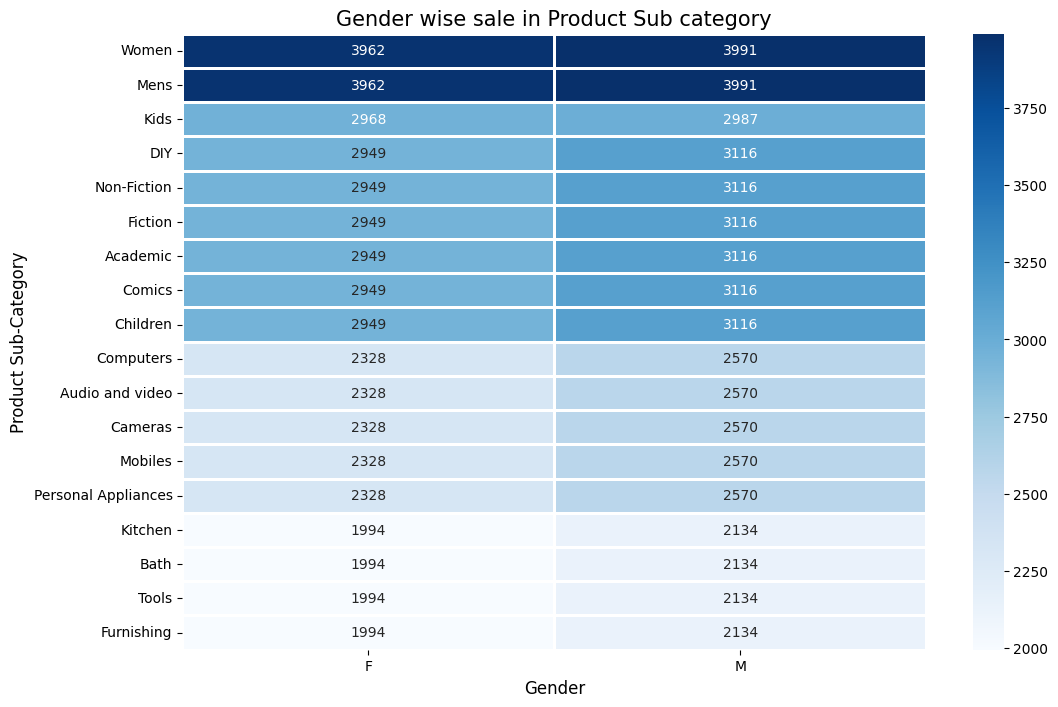

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(u, annot=True, fmt='d', cmap='Blues', linewidths=2)
plt.title('Gender wise sale in Product Sub category', fontsize=15)
plt.xlabel('Gender',fontsize=12)
plt.ylabel('Product Sub-Category',fontsize=12)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)

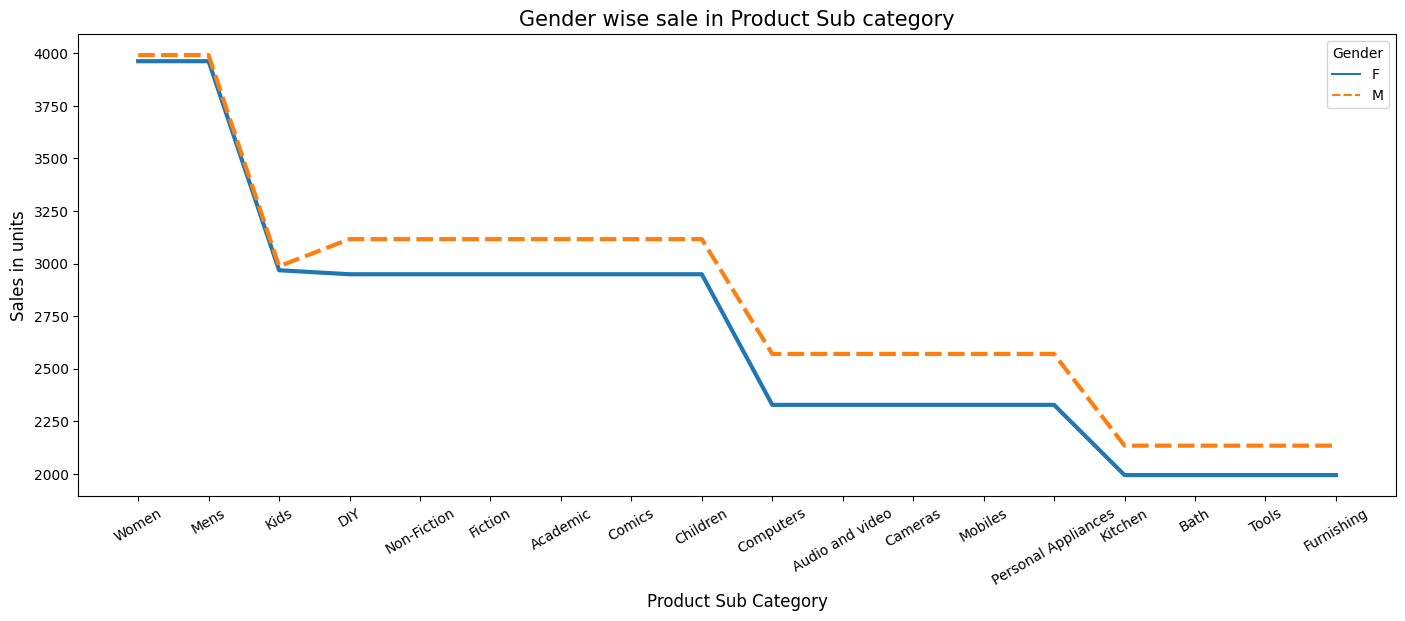

In [ ]:
plt.figure(figsize= (17,6))
sns.lineplot(u, linewidth=3)
plt.title('Gender wise sale in Product Sub category', fontsize=15)
plt.xlabel('Product Sub Category',fontsize=12)
plt.ylabel('Sales in units',fontsize=12)
plt.xticks(fontsize= 10, rotation=30)
plt.ticklabel_format(style='plain', axis='y')

In [ ]:
h=pd.crosstab(df_all.prod_subcat, df_all.Gender, margins=True)
h = h.sort_values(by='F', ascending=False)
h

Gender,F,M,All
prod_subcat,,,
All,48202,51051,99253
Women,3962,3991,7953
Mens,3962,3991,7953
Kids,2968,2987,5955
DIY,2949,3116,6065
Non-Fiction,2949,3116,6065
Fiction,2949,3116,6065
Academic,2949,3116,6065
Comics,2949,3116,6065


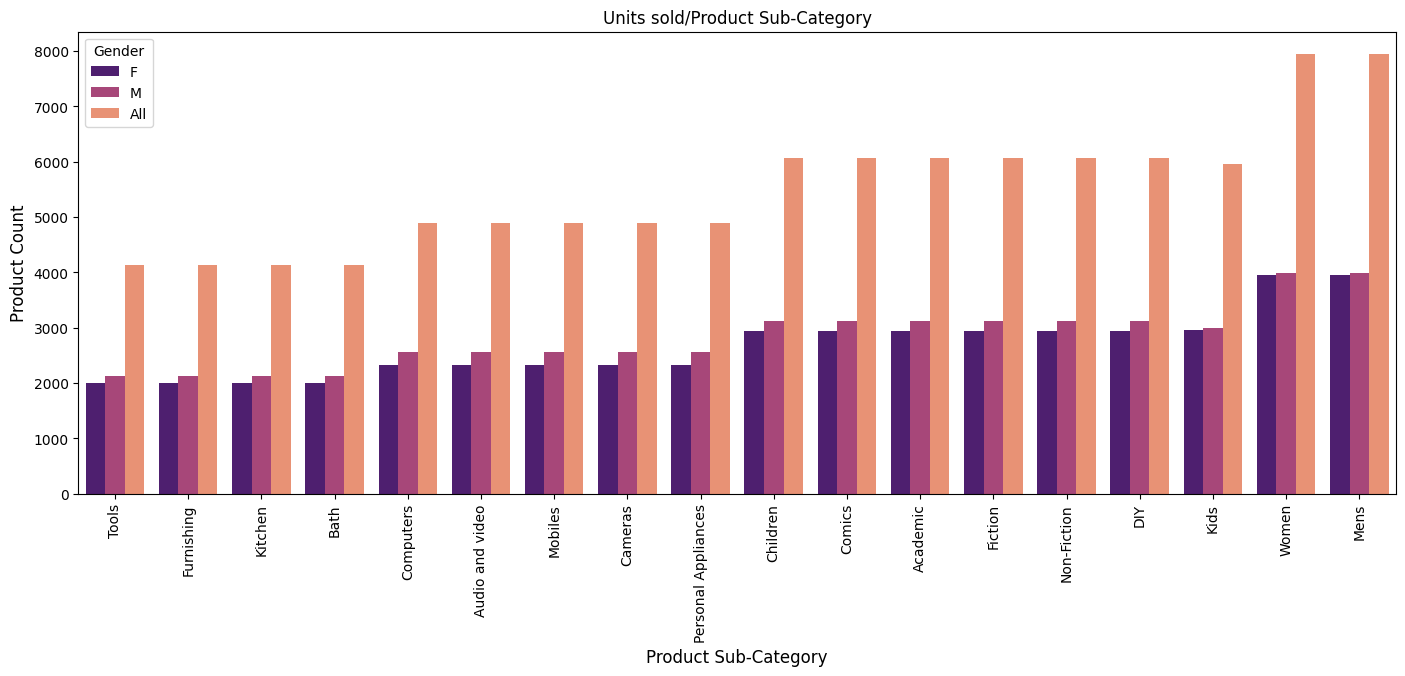

In [ ]:
key= h.index
a1 = h.F
a2 = h.M
a3 = h.All

value = list(zip(a1,a2,a3))
d = dict(zip(key,value))
del d['All']
d.update({'Gender':('F','M','All')})


df2 = pd.DataFrame(d).set_index('Gender')
ndf2= df2.stack().reset_index()
ndf2.columns = ['Gender', 'Product_subcategory', 'Count']
ndf2 = ndf2.sort_values(by='Count')


plt.figure(figsize=(17,6))
sns.barplot(x='Product_subcategory', y='Count', hue='Gender', data=ndf2, palette= 'magma')
plt.xticks(rotation=90)
plt.xlabel('Product Sub-Category', fontsize=12)
plt.ylabel('Product Count', fontsize=12)
plt.title('Units sold/Product Sub-Category')
plt.ticklabel_format(style='plain', axis='y')

**Finding out the total amount of sales which is popular among Male and Female gender individually**

In [ ]:
# Popular among Male
M = df_all.loc[df_all['Gender']=='M']
group_prod = M.groupby(['prod_cat'])['total_amt'].sum()
popular_M = group_prod.nlargest(1)
bold = '\033[1m'
reset = '\033[0m'
print(f'The most popular product category in {bold}Male{reset} customers is :\n{bold}{popular_M}{reset}')

The most popular product category in Male customers is :
prod_cat
Books    39875836.65
Name: total_amt, dtype: float64


In [ ]:
# Popular among Female
F = df_all.loc[df_all['Gender']=='F']
group_prod1 = F.groupby(['prod_cat'])['total_amt'].sum()
popular_F = group_prod1.nlargest(1)
bold = '\033[1m'
reset = '\033[0m'
print(f'The most popular product category in {bold}Female{reset} customers is :\n{bold}{popular_F}{reset}')


The most popular product category in Female customers is :
prod_cat
Books    36988153.41
Name: total_amt, dtype: float64


In [ ]:
S=pd.crosstab(df_all.prod_cat, df_all.Gender, values = df_all.total_amt , aggfunc=np.sum)
S = S.sort_values(by='F')
S

Gender,F,M
prod_cat,,
Bags,4.155971e+06,4.093446e+06
Clothing,9.080252e+06,9.672238e+06
Footwear,9.607659e+06,9.044016e+06
Home and kitchen,1.652871e+07,1.720430e+07
Electronics,2.509677e+07,2.851555e+07
Books,3.698815e+07,3.987584e+07


In [ ]:
g=pd.crosstab(df_all.prod_cat, df_all.Gender, values = df_all.total_amt , aggfunc=np.sum, margins=True)
g = g.sort_values(by='F')
g

Gender,F,M,All
prod_cat,,,
Bags,4.155971e+06,4.093446e+06,8.249417e+06
Clothing,9.080252e+06,9.672238e+06,1.875249e+07
Footwear,9.607659e+06,9.044016e+06,1.865168e+07
Home and kitchen,1.652871e+07,1.720430e+07,3.373301e+07
Electronics,2.509677e+07,2.851555e+07,5.361232e+07
Books,3.698815e+07,3.987584e+07,7.686399e+07
All,1.014575e+08,1.084054e+08,2.098629e+08


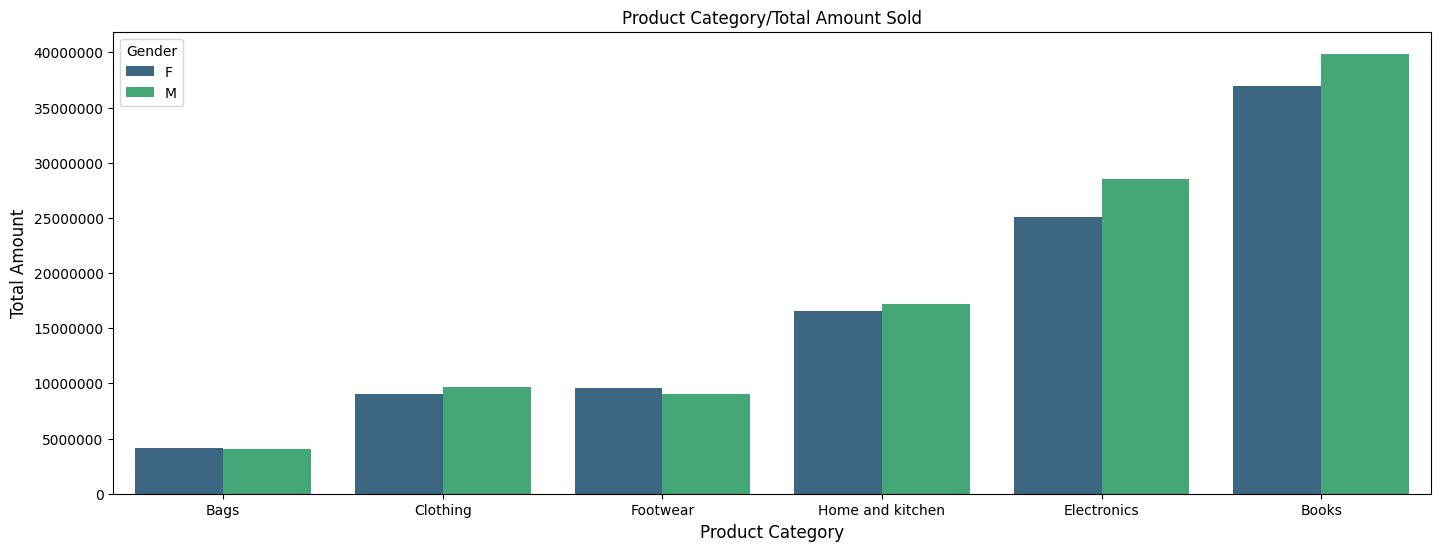

In [ ]:
k = S.index
v1 = S.F
v2 = S.M
v = list(zip(v1, v2))
f = dict(zip(k, v))
f.update({'Gender':['F','M']})


newd = pd.DataFrame(f).set_index('Gender')
anewd = newd.stack().reset_index()
anewd.columns = ['Gender', 'Product_category', 'Amount']

plt.figure(figsize=(17,6))
sns.barplot(x='Product_category', y = 'Amount', hue='Gender', data=anewd, palette= 'viridis')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.title('Product Category/Total Amount Sold')
plt.ticklabel_format(style='plain', axis='y')


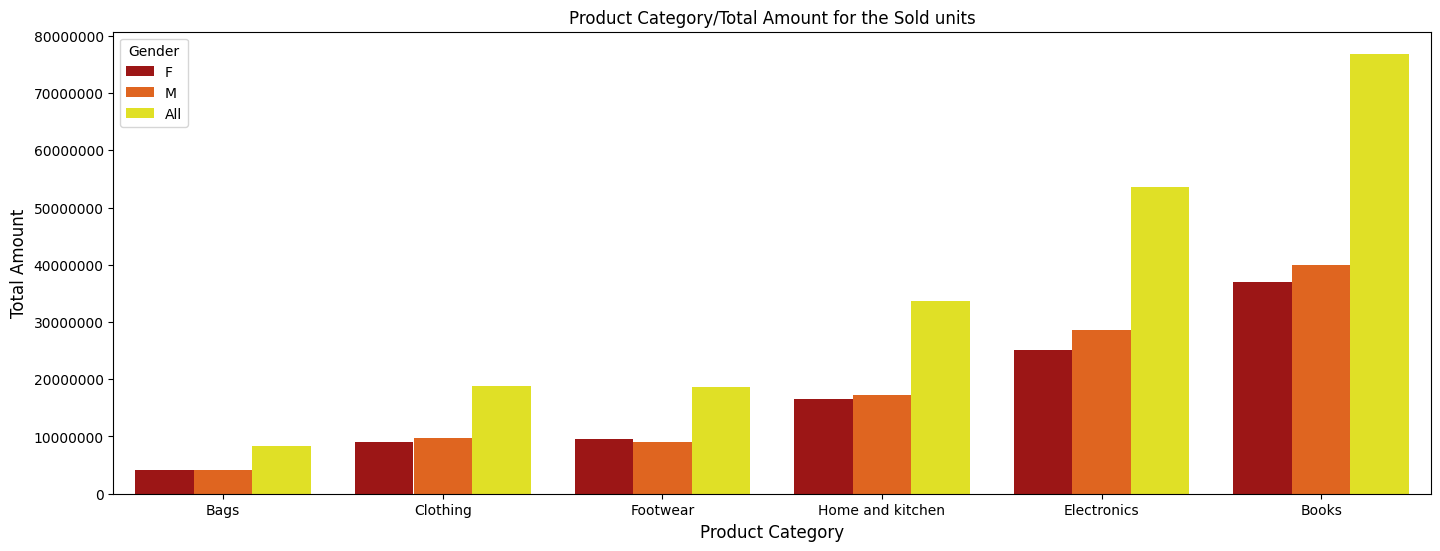

In [ ]:
k1 = g.index
v11 = g.F
v22 = g.M
v33 = g.All
v0 = list(zip(v11, v22, v33))
f0 = dict(zip(k1, v0))
del f0['All']
f0.update({'Gender':['F','M','All']})

newd0 = pd.DataFrame(f0).set_index('Gender')
anewd0 = newd0.unstack().reset_index()
anewd0.columns = ['Pcat', 'Gender', 'Amount']

plt.figure(figsize=(17,6))
sns.barplot(x='Pcat', y = 'Amount', hue='Gender', data=anewd0, palette= 'hot')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.title('Product Category/Total Amount for the Sold units')
plt.ticklabel_format(style='plain', axis='y')
